In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_raw=pd.read_csv('train.csv')
test_raw=pd.read_csv('test.csv')

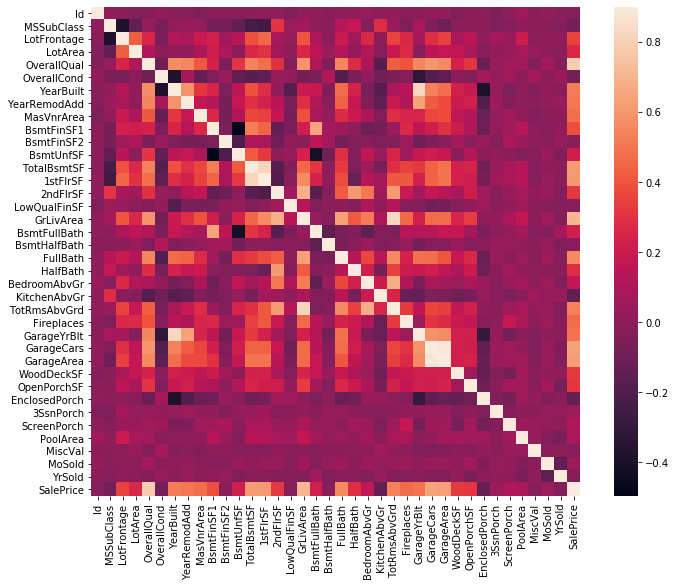

In [3]:
corrmat = train_raw.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

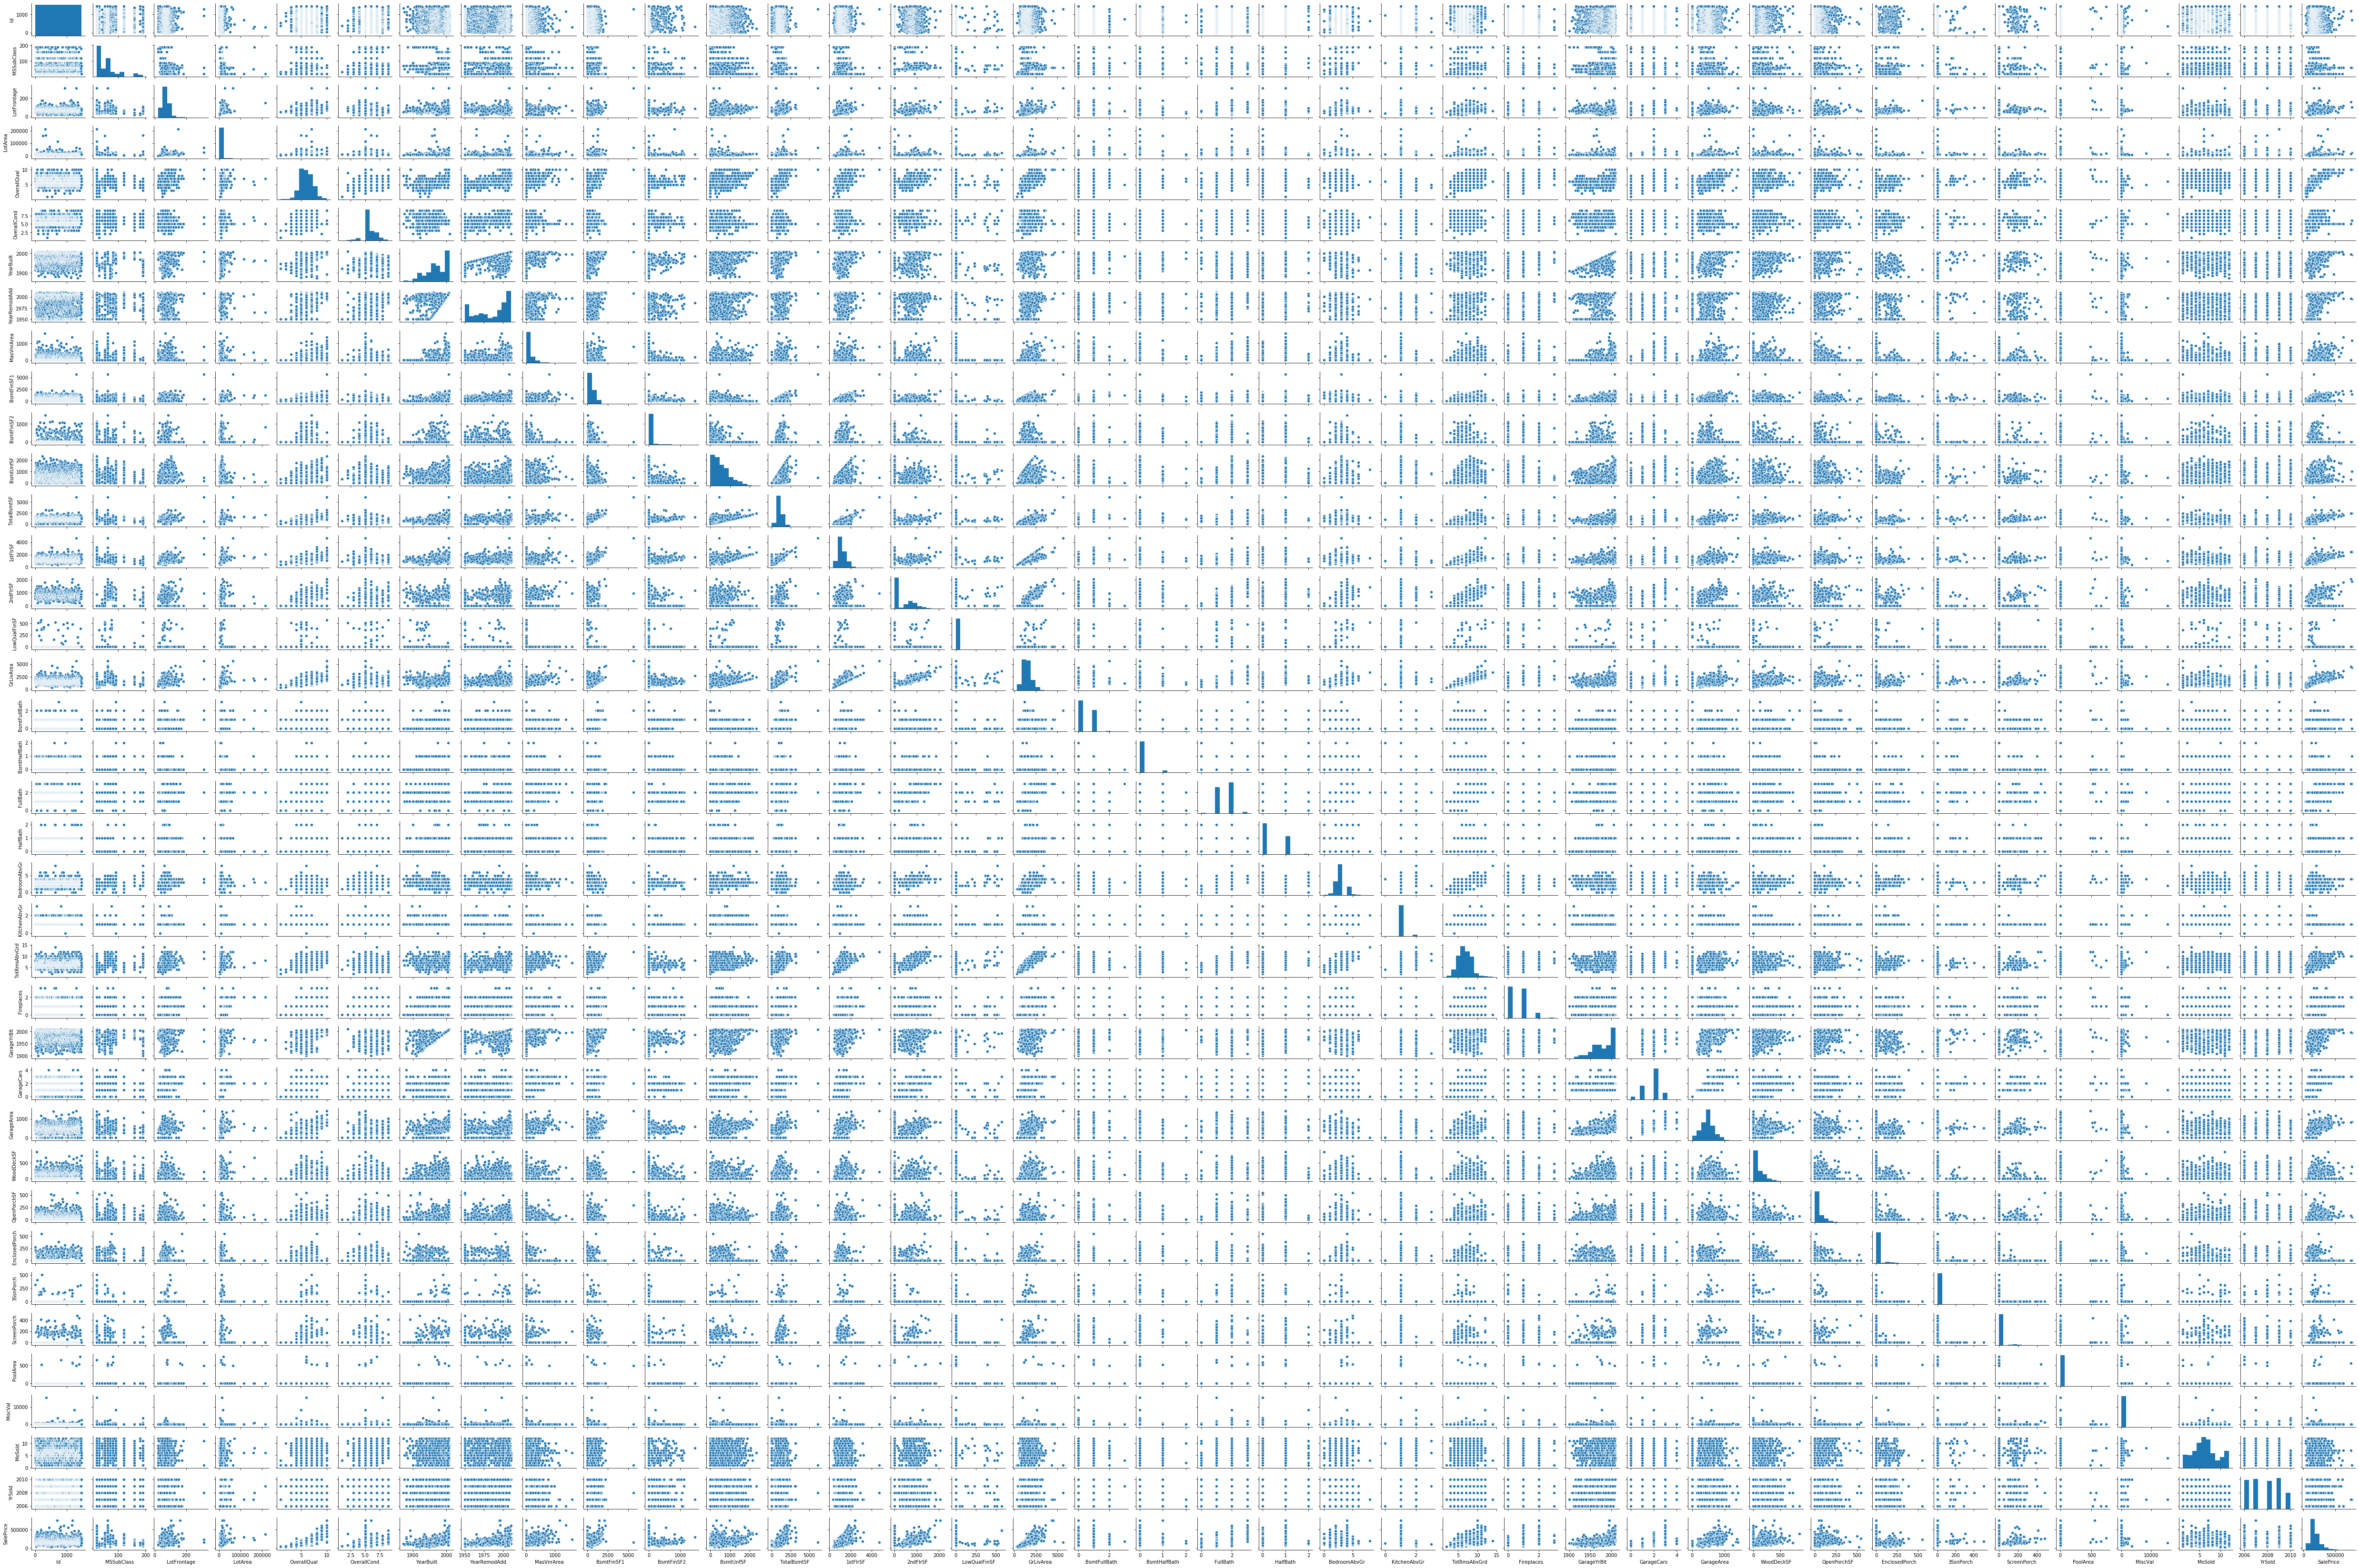

In [3]:
sns.pairplot(train_raw, height=1.2, aspect=1.5)

In [4]:
#train_raw = train_raw.drop(train_raw[(train_raw['GrLivArea']>4000) & (train_raw['SalePrice']<300000)].index)

In [3]:
train_raw.shape,test_raw.shape

((1460, 81), (1459, 80))

In [4]:
combine=pd.concat((train_raw,test_raw)).reset_index(drop=True)

In [5]:
combine.shape

(2919, 81)

In [6]:
pd.set_option('display.max_rows', None)

In [7]:
combine.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
combine.HouseStyle.value_counts()

1Story    1471
2Story     872
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: HouseStyle, dtype: int64

In [9]:
combine.FullBath.value_counts()

2    1530
1    1309
3      64
0      12
4       4
Name: FullBath, dtype: int64

In [27]:
combine.dtypes.value_counts()

object     43
int64      26
float64    12
dtype: int64

In [21]:
combine.columns.astype('object').count()

AttributeError: 'DataFrame' object has no attribute 'column'

In [12]:
combine.isnull().sum().sum()

15417

In [13]:
nullity=combine.isnull().sum()[ combine.isnull().sum()!= 0]
nullity

MSZoning           4
LotFrontage      486
Alley           2719
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2908
Fence           2346
MiscFeature     2812
SaleType           1
SalePrice       1459
dtype: int64

In [14]:
nullity.shape

(35,)

In [15]:
combine.MSZoning.value_counts()

RL         2263
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [16]:
combine['MSZoning']=combine['MSZoning'].fillna('None')
combine.MSZoning.value_counts()

RL         2263
RM          460
FV          139
RH           26
C (all)      25
None          4
Name: MSZoning, dtype: int64

In [17]:
combine.LotFrontage.dtype

dtype('float64')

In [18]:
combine['LotFrontage']=combine.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))

In [19]:
combine.Alley.value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [20]:
combine['Alley']=combine['Alley'].fillna('None')
combine.Alley.value_counts()

None    2719
Grvl     120
Pave      78
Name: Alley, dtype: int64

In [21]:
combine.Utilities.value_counts()

AllPub    2914
NoSeWa       1
Name: Utilities, dtype: int64

In [22]:
test_raw.Utilities.value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [23]:
combine=combine.drop(['Utilities'],axis=1)

In [24]:
combine.Exterior1st.value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     125
BrkFace      87
WdShing      56
AsbShng      44
Stucco       42
BrkComm       6
Stone         2
CBlock        2
AsphShn       2
ImStucc       1
Name: Exterior1st, dtype: int64

In [25]:
combine['Exterior1st']=combine['Exterior1st'].fillna('Other')
combine.Exterior1st.value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     125
BrkFace      87
WdShing      56
AsbShng      44
Stucco       42
BrkComm       6
Stone         2
CBlock        2
AsphShn       2
Other         1
ImStucc       1
Name: Exterior1st, dtype: int64

In [26]:
combine['Exterior2nd']=combine['Exterior2nd'].fillna('Other')
combine.Exterior2nd.value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     125
Wd Shng      81
BrkFace      47
Stucco       46
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         2
Name: Exterior2nd, dtype: int64

In [27]:
combine.MasVnrType.value_counts()

None       1742
BrkFace     879
Stone       247
BrkCmn       25
Name: MasVnrType, dtype: int64

In [28]:
combine['MasVnrType']=combine['MasVnrType'].fillna('None')
combine.MasVnrType.value_counts()

None       1766
BrkFace     879
Stone       247
BrkCmn       25
Name: MasVnrType, dtype: int64

In [29]:
combine.MasVnrArea.dtype

dtype('float64')

In [30]:
combine['MasVnrArea']=combine['MasVnrArea'].fillna(0)
combine.MasVnrArea.isnull().sum()

0

In [31]:
combine.BsmtQual.value_counts()

TA    1283
Gd    1209
Ex     256
Fa      88
Name: BsmtQual, dtype: int64

In [32]:
combine['BsmtQual']=combine['BsmtQual'].fillna('None')
combine.BsmtQual.value_counts()

TA      1283
Gd      1209
Ex       256
Fa        88
None      81
Name: BsmtQual, dtype: int64

In [33]:
combine.BsmtCond.value_counts()

TA    2604
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64

In [34]:
combine['BsmtCond']=combine['BsmtCond'].fillna('None')
combine.BsmtCond.value_counts()

TA      2604
Gd       122
Fa       104
None      82
Po         5
Name: BsmtCond, dtype: int64

In [35]:
combine.BsmtExposure.value_counts()

No    1904
Av     418
Gd     274
Mn     239
Name: BsmtExposure, dtype: int64

In [36]:
combine['BsmtExposure']=combine['BsmtExposure'].fillna('None')
combine.BsmtExposure.value_counts()

No      1904
Av       418
Gd       274
Mn       239
None      82
Name: BsmtExposure, dtype: int64

In [37]:
combine.BsmtFinType1.value_counts()

Unf    851
GLQ    847
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64

In [38]:
combine['BsmtFinType1']=combine['BsmtFinType1'].fillna('None')
combine.BsmtFinType1.value_counts()

Unf     851
GLQ     847
ALQ     429
Rec     288
BLQ     269
LwQ     154
None     79
Name: BsmtFinType1, dtype: int64

In [39]:
combine.BsmtFinType1[combine.BsmtFinSF1.isnull()]

2118    None
Name: BsmtFinType1, dtype: object

In [40]:
combine['BsmtFinSF1']=combine['BsmtFinSF1'].fillna(0)
combine.BsmtFinSF1.isnull().sum()

0

In [41]:
combine.BsmtFinType2.value_counts()

Unf    2491
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64

In [42]:
combine['BsmtFinType2']=combine['BsmtFinType2'].fillna('None')
combine.BsmtFinType2.value_counts()

Unf     2491
Rec      105
LwQ       87
None      80
BLQ       68
ALQ       52
GLQ       34
Name: BsmtFinType2, dtype: int64

In [43]:
combine['BsmtFinSF2']=combine['BsmtFinSF2'].fillna(0)
combine.BsmtFinSF2.isnull().sum()

0

In [44]:
combine['BsmtUnfSF']=combine['BsmtUnfSF'].fillna(0)
combine.BsmtUnfSF.isnull().sum()

0

In [45]:
combine['TotalBsmtSF']=combine['TotalBsmtSF'].fillna(0)
combine.TotalBsmtSF.isnull().sum()

0

In [46]:
combine.Electrical.value_counts()

SBrkr    2669
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [47]:
combine.Neighborhood[combine.Electrical.isnull()]

1377    Timber
Name: Neighborhood, dtype: object

In [48]:
combine[combine.Neighborhood == 'Timber'].Electrical.value_counts()

SBrkr    70
FuseA     1
Name: Electrical, dtype: int64

In [49]:
combine['Electrical']=combine['Electrical'].fillna('SBrkr')
combine.Electrical.value_counts()

SBrkr    2670
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [50]:
combine.BsmtFullBath.value_counts()

0.0    1705
1.0    1171
2.0      37
3.0       2
Name: BsmtFullBath, dtype: int64

In [51]:
combine['BsmtFullBath']=combine['BsmtFullBath'].fillna(0)
combine.BsmtFullBath.value_counts()

0.0    1707
1.0    1171
2.0      37
3.0       2
Name: BsmtFullBath, dtype: int64

In [52]:
combine.BsmtHalfBath.value_counts()

0.0    2740
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64

In [53]:
combine['BsmtHalfBath']=combine['BsmtHalfBath'].fillna(0)
combine.BsmtHalfBath.value_counts()

0.0    2742
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64

In [54]:
combine.KitchenQual.value_counts()

TA    1492
Gd    1151
Ex     203
Fa      70
Name: KitchenQual, dtype: int64

In [55]:
combine.KitchenAbvGr.value_counts()

1    2783
2     129
0       3
3       2
Name: KitchenAbvGr, dtype: int64

In [56]:
combine.KitchenAbvGr[combine.KitchenQual.isnull()]

1553    1
Name: KitchenAbvGr, dtype: int64

In [57]:
combine.KitchenQual[combine.KitchenAbvGr == 1].value_counts()

TA    1372
Gd    1146
Ex     203
Fa      61
Name: KitchenQual, dtype: int64

In [58]:
combine['KitchenQual']=combine['KitchenQual'].fillna('TA')
combine.KitchenQual.value_counts()

TA    1493
Gd    1151
Ex     203
Fa      70
Name: KitchenQual, dtype: int64

In [59]:
combine.Functional.value_counts()

Typ     2715
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [60]:
combine['Functional']=combine['Functional'].fillna('Typ')
combine.Functional.value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [61]:
combine.FireplaceQu.value_counts()

Gd    742
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

In [62]:
combine.Fireplaces.value_counts()

0    1420
1    1267
2     219
3      10
4       1
Name: Fireplaces, dtype: int64

In [63]:
combine.FireplaceQu.isnull().sum()

1420

In [64]:
combine['FireplaceQu']=combine['FireplaceQu'].fillna('None')
combine.FireplaceQu.value_counts()

None    1420
Gd       742
TA       592
Fa        74
Po        46
Ex        43
Name: FireplaceQu, dtype: int64

In [65]:
combine.GarageType.value_counts()

Attchd     1722
Detchd      779
BuiltIn     185
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

In [66]:
combine['GarageType']=combine['GarageType'].fillna('None')
combine.GarageType.value_counts()

Attchd     1722
Detchd      779
BuiltIn     185
None        157
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

In [67]:
combine['GarageYrBlt']=combine['GarageYrBlt'].fillna(0)
combine.GarageYrBlt.isnull().sum()

0

In [68]:
combine.GarageFinish.value_counts()

Unf    1230
RFn     811
Fin     717
Name: GarageFinish, dtype: int64

In [69]:
combine['GarageFinish']=combine['GarageFinish'].fillna('None')
combine.GarageFinish.value_counts()

Unf     1230
RFn      811
Fin      717
None     159
Name: GarageFinish, dtype: int64

In [70]:
combine.GarageCars.value_counts()

2.0    1593
1.0     776
3.0     373
0.0     157
4.0      16
5.0       1
Name: GarageCars, dtype: int64

In [71]:
combine['GarageCars']=combine['GarageCars'].fillna(0)
combine.GarageCars.value_counts()

2.0    1593
1.0     776
3.0     373
0.0     158
4.0      16
5.0       1
Name: GarageCars, dtype: int64

In [72]:
combine['GarageArea']=combine['GarageArea'].fillna(0)
combine.GarageArea.isnull().sum()

0

In [73]:
combine.GarageQual.value_counts()

TA    2602
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64

In [74]:
combine['GarageQual']=combine['GarageQual'].fillna('None')
combine.GarageQual.value_counts()

TA      2602
None     159
Fa       124
Gd        24
Po         5
Ex         3
Name: GarageQual, dtype: int64

In [75]:
combine.GarageCond.value_counts()

TA    2652
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64

In [76]:
combine['GarageCond']=combine['GarageCond'].fillna('None')
combine.GarageCond.value_counts()

TA      2652
None     159
Fa        74
Gd        15
Po        14
Ex         3
Name: GarageCond, dtype: int64

In [77]:
combine.PoolArea.value_counts()

0      2905
561       1
555       1
519       1
800       1
738       1
648       1
576       1
512       1
444       1
368       1
228       1
144       1
Name: PoolArea, dtype: int64

In [78]:
combine.PoolQC.value_counts()

Ex    4
Gd    3
Fa    2
Name: PoolQC, dtype: int64

In [79]:
combine['PoolQC']=combine['PoolQC'].fillna('None')
combine.PoolQC.value_counts()

None    2908
Ex         4
Gd         3
Fa         2
Name: PoolQC, dtype: int64

In [80]:
combine.Fence.value_counts()

MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

In [81]:
combine['Fence']=combine['Fence'].fillna('None')
combine.Fence.value_counts()

None     2346
MnPrv     329
GdPrv     118
GdWo      112
MnWw       12
Name: Fence, dtype: int64

In [82]:
combine.MiscFeature.value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

In [83]:
combine['MiscFeature']=combine['MiscFeature'].fillna('None')
combine.MiscFeature.value_counts()

None    2812
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64

In [84]:
combine.SaleType.value_counts()

WD       2525
New       237
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [85]:
combine['SaleType']=combine['SaleType'].fillna('WD')
combine.SaleType.value_counts()

WD       2526
New       237
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [86]:
combine['SalePrice']=combine['SalePrice'].fillna(0)
combine.SalePrice.isnull().sum()

0

In [87]:
combine.isnull().sum().sum()

0

In [88]:
combine.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckS

In [89]:
combine.YrSold.value_counts()

2007    691
2009    647
2008    621
2006    619
2010    339
Name: YrSold, dtype: int64

In [90]:
test_raw.YrSold.value_counts()

2007    363
2008    318
2009    309
2006    305
2010    164
Name: YrSold, dtype: int64

In [91]:
combine['Age']=combine['YrSold']-combine['YearBuilt']

In [92]:
combine['PriceFlux']=2011-combine['YrSold']

In [93]:
combine['Renew']=combine['YrSold']-combine['YearRemodAdd']

In [94]:
combine['MSSubClass']=combine['MSSubClass'].apply(str)

In [95]:
from sklearn.preprocessing import LabelEncoder

In [96]:
Label_cols=['MSSubClass','LotShape','LandContour','LandSlope','BldgType','HouseStyle','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']
for col in Label_cols:
    lbe=LabelEncoder()
    lbe.fit(list(combine[col].values))
    combine[col]=lbe.transform(list(combine[col].values))

In [97]:
list(combine.select_dtypes(['object']).columns)

['MSZoning',
 'Street',
 'Alley',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'GarageType']

In [98]:
combine=combine.drop(['YearBuilt','YearRemodAdd','MoSold','YrSold','GarageYrBlt'],axis=1)

In [99]:
combine.shape

(2917, 78)

In [100]:
combine=pd.get_dummies(combine)

In [101]:
combine.shape

(2917, 189)

In [102]:
pd.options.display.max_columns=None
combine.columns.values

array(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LandSlope', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence',
       'MiscFeature', 'MiscVal', 'SaleType', 'SaleCondition', 'SalePrice',
       'Age', 'PriceFlux', 'Renew', 'MSZoning_C (all)', 'MSZoning_FV',
      

In [103]:
test_raw.GarageType.value_counts()

Attchd     853
Detchd     392
BuiltIn     98
Basment     17
2Types      17
CarPort      6
Name: GarageType, dtype: int64

In [104]:
combine=combine.drop(['MSZoning_None','Street_Pave','Alley_None','LotConfig_Inside','Neighborhood_NAmes','Condition1_Norm','Condition2_Norm','RoofStyle_Gable','RoofMatl_CompShg','Exterior1st_VinylSd','Exterior2nd_VinylSd','MasVnrType_None','Foundation_PConc','Heating_GasA','GarageType_None'],axis=1)

In [105]:
combine.shape

(2917, 174)

In [106]:
train_full=combine[combine.SalePrice!=0]
train_full.shape

(1458, 174)

In [107]:
train_full=train_full.drop(['Id'],axis=1)

In [108]:
#train_full.to_csv('train_full.csv')

In [109]:
test_full=combine[combine.SalePrice==0]
test_full.shape

(1459, 174)

In [110]:
train_full.shape

(1458, 173)

In [111]:
train_full.head()

MSSubClass  LotFrontage  LotArea  LotShape  LandContour  LandSlope  \
0          10         65.0     8450         3            3          0   
1           5         80.0     9600         3            3          0   
2          10         68.0    11250         0            3          0   
3          11         60.0     9550         0            3          0   
4          10         84.0    14260         0            3          0   

   BldgType  HouseStyle  OverallQual  OverallCond  MasVnrArea  ExterQual  \
0         0           5            7            5       196.0          2   
1         0           2            6            8         0.0          3   
2         0           5            7            5       162.0          2   
3         0           5            7            5         0.0          3   
4         0           5            8            5       350.0          2   

   ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0          4         2         4             3             2       706.0   
1          4         2         4             1             0       978.0   
2          4         2         4             2             2       486.0   
3          4         4         1             3             0       216.0   
4          4         2         4             0             2       655.0   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  \
0             6         0.0      150.0        856.0          0           1   
1             6         0.0      284.0       1262.0          0           1   
2             6         0.0      434.0        920.0          0           1   
3             6         0.0      540.0        756.0          2           1   
4             6         0.0      490.0       1145.0          0           1   

   Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0           4       856       854             0       1710           1.0   
1           4      1262         0             0       1262           0.0   
2           4       920       866             0       1786           1.0   
3           4       961       756             0       1717           1.0   
4           4      1145      1053             0       2198           1.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0           0.0         2         1             3             1            2   
1           1.0         2         0             3             1            3   
2           0.0         2         1             3             1            2   
3           0.0         1         0             3             1            2   
4           0.0         2         1             4             1            2   

   TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageFinish  \
0             8           6           0            3             2   
1             6           6           1            5             2   
2             6           6           1            5             2   
3             7           6           1            2             3   
4             9           6           1            5             2   

   GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  \
0         2.0       548.0           5           5           2           0   
1         2.0       460.0           5           5           2         298   
2         2.0       608.0           5           5           2           0   
3         3.0       642.0           5           5           2           0   
4         3.0       836.0           5           5           2         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC  \
0           61              0          0            0         0       3   
1            0              0          0            0         0       3   
2           42              0          0            0         0       3   
3           35            272          0            0      

In [112]:
test_full=test_full.drop(['Id'],axis=1)

In [113]:
#test_full.to_csv('test_full.csv')